# Disciplina Tópicos Especiais II (C318)

###### Curso: Fundamentos de Machine Learning
###### Alunas: Luana Gribel, Mariana Helena, Sarah Brandão e Sinara Pimenta
###### Professor: Ricardo Augusto

End-to-End Machine Learning Project - Análise e Modelagem - Dataframe: Diabetes

-------------------------------------------------------------------------------------------------------------------------------

##### Objetivo: Prever se um paciente tem diabetes ou tendência a ter essa doença com bases em alguns dados médicos.

##### Regras de Negócio:
- É possível prever que um indivíduo pode possuir diabetes com base em dados médicos de forma automatizada, sem supervisão profissional?

- Qual o principal sintoma?

- Qual a principal doença recorrente em quem tem diabetes?

- Existe uma tendência maior em algum gênero ou faixa etária?

##### Tipo de problema: Classificação Binária

##### Enquadramento:
Aprendizagem supervisionada, porque a saída é conhecida.

## Importação de dados e bibliotecas

##### Bibliotecas utilizadas no projeto

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.model_selection import StratifiedKFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

##### Importação da base de dados

In [6]:
# Especificando diretório para carregamento do arquivo (.csv)
df = pd.read_csv('diabetes.csv')

Obtendo informações sobre o dataframe:

In [7]:
# Informações sobre o dataframe (atributo info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

##### Informações sobre o dataset:

Contexto: Dataset obtido a partir da coleta de dados com a aplicação de questionários para os pacientes do Sylhet Diabetes Hospital in Sylhet em Bangladesh.

Atributos:

| Atributo | Descrição | Valores |
|--- |--- |--- |
| Age | Faixa etária abordada na pesquisa | 20-65 |
| Gender | Gênero | Male/Female |
| Polyuria | Termo médico que faz referência ao sintoma de urinar em excesso (acima de 2,5 litros por dia) | Yes/No |
| Polydipsia | Polidipsia é um termo médico que define o sintoma caracterizado por excessiva sensação de sede | Yes/No |
| Sudden weight loss | Perda de peso repentina | Yes/No |
| Weakness | Fraqueza | Yes/No |
| Polyphagia | Polifagia é um sinal médico que significa fome excessiva e ingestão anormalmente alta de sólidos pela boca | Yes/No |
| Genital thrush | (Candidíase) é uma infecção fúngica causada por qualquer tipo do fungo Candida. | Yes/No |
| Visual blurring | Visão turva | Yes/No |
| Itching | Coceira | Yes/No |
| Irritability | Irritabilidade | Yes/No |
| Delayed healing | Cura demorada | Yes/No |
| Partial paresis | Paresia (Diminuição da força muscular)| Yes/No |
| Muscle stiffness | Rigidez muscilar| Yes/No |
| Alopecia | Perda de pelos do corpo | Yes/No |
| Obesity | Obesidade | Yes/No |
| Class | Classificação (Possui ou não diabetes) | Positive/Negative |

## Informações iniciais 

Gerando estatisticas em cima das variáveis numéricas, no caso apenas a variável idade.

In [8]:
# Descrição estatística do atributo Age
df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


Observações:
- Média de idade das pessoas que participaram da pesquisa é igual a 48 anos.
- A idade mínima de um paciente foi 16 anos
- A idade máxima de um paciente foi 90 anos
- 25% da população analisada possui 39 anos
- 75% da população analisada possui 57 anos

Levantando variações de resultados das variáveis categóricas:

In [9]:
# Verificando as variáveis categóricas
generos = df["Gender"].value_counts()
print(generos)
print('----------------------------')
poliuria = df["Polyuria"].value_counts()
print(poliuria)
print('----------------------------')
polidipsia = df["Polydipsia"].value_counts()
print(polidipsia)
print('----------------------------')
swl = df["sudden weight loss"].value_counts()
print(swl)
print('----------------------------')
weakness = df["weakness"].value_counts()
print(weakness)
print('----------------------------')
polifagia = df["Polyphagia"].value_counts()
print(polifagia)
print('----------------------------')
gt = df["Genital thrush"].value_counts()
print(gt)
print('----------------------------')
vb = df["visual blurring"].value_counts()
print(vb)
print('----------------------------')
itching = df["Itching"].value_counts()
print(itching)
print('----------------------------')
irritability = df["Irritability"].value_counts()
print(irritability)
print('----------------------------')
dh = df["delayed healing"].value_counts()
print(dh)
print('----------------------------')
pp = df["partial paresis"].value_counts()
print(pp)
print('----------------------------')
ms = df["muscle stiffness"].value_counts()
print(ms)
print('----------------------------')
alopecia = df["Alopecia"].value_counts()
print(alopecia)
print('----------------------------')
obesidade = df["Obesity"].value_counts()
print(obesidade)

Male      328
Female    192
Name: Gender, dtype: int64
----------------------------
No     262
Yes    258
Name: Polyuria, dtype: int64
----------------------------
No     287
Yes    233
Name: Polydipsia, dtype: int64
----------------------------
No     303
Yes    217
Name: sudden weight loss, dtype: int64
----------------------------
Yes    305
No     215
Name: weakness, dtype: int64
----------------------------
No     283
Yes    237
Name: Polyphagia, dtype: int64
----------------------------
No     404
Yes    116
Name: Genital thrush, dtype: int64
----------------------------
No     287
Yes    233
Name: visual blurring, dtype: int64
----------------------------
No     267
Yes    253
Name: Itching, dtype: int64
----------------------------
No     394
Yes    126
Name: Irritability, dtype: int64
----------------------------
No     281
Yes    239
Name: delayed healing, dtype: int64
----------------------------
No     296
Yes    224
Name: partial paresis, dtype: int64
---------------------

É importante ressaltar que a feature Obesidade foi a que mais apresentou divergência na quantidade de pessoas que possui e que não possui essa doença crônica (432 não possui e 88 possui). E isso pode acabar impactando na resposta do modelo e até mesmo na corelação da feature com a variável target.

Levando isso da feature Obesidade em consideração, é imprescindível analisar a variável target a fim de validar se o classificador não tende a ficar inclinado a uma resposta específica:

In [10]:
df["class"].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

Concluindo: de certa forma os resultados estão bem ditribuidos em termos de quantidade e com essa distribuição o classificador não será tendencioso.

Plotando histograma da variável idade em cima de uma amostra da população total:

Text(0, 0.5, 'Quantidade de pessoas')

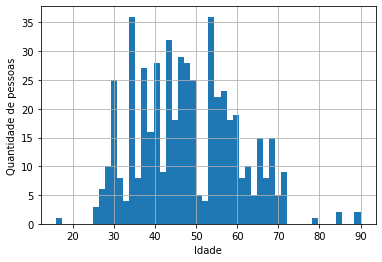

In [11]:
# Histograma plotado em cima da quantidade de pessoas
df['Age'].hist(bins = 50)
plt.xlabel('Idade')
plt.ylabel('Quantidade de pessoas')

É apresentada uma estimativa empírica (em cima da amostra), a fim de apresentar a variação da quantidade de pessoas presentes de acordo com a idade de cada uma.

Agora utilizando a biblioteca Klib, podemos mostrar a Densidade de Probabilidade da População e sair de uma estimativa empírica:

<AxesSubplot:xlabel='Age', ylabel='Density'>

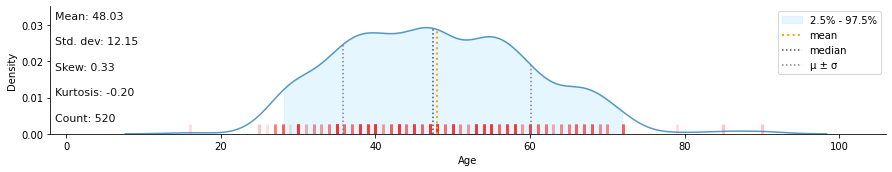

In [12]:
#Dispersão da variável Age
klib.dist_plot(df['Age'])

É possivel a partir disso:
- Realizar inferências estatísticas
- Verificar o quão assimétrico estão os dados (skew)
- Verificar o quão achatada se encontra a distribuição (Kurtosis)
- Verificar a média de idade

Ainda podemos estender a análise da densidade de probabilidade para apenas quem possui Diabetes:

<AxesSubplot:xlabel='Age', ylabel='Density'>

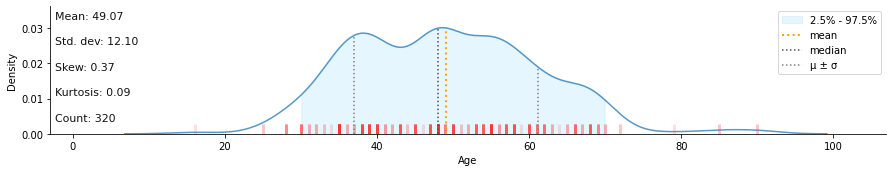

In [13]:
#Dispersão da variável Age, para pessoas que possuem diabetes
df_positive = df[(df['class']=='Positive')]
klib.dist_plot(df_positive['Age'])

 - A média de idade das pessoas que possuem diabetes é de 49 anos
 - 320 pessoas possuem essa condição

Para as pessoas que não possuem Diabetes:

<AxesSubplot:xlabel='Age', ylabel='Density'>

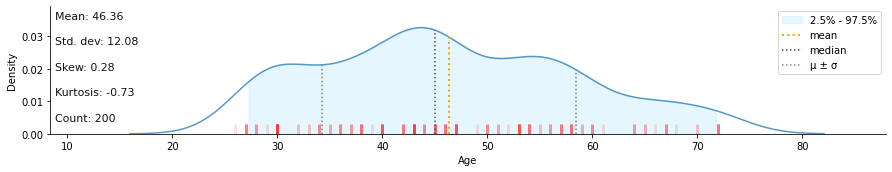

In [14]:
#Dispersão da variável Age, para pessoas que não possuem diabetes
df_negative = df[(df['class']=='Negative')]
klib.dist_plot(df_negative['Age'])

- A média de idade das pessoas que não possuem diabetes é de 46 anos.
- 200 pessoas não apresentam a doença

## Preparação dos Dados - Manipulando features categóricas (ordinal encoder)

Com exceção da variável idade ('age'), todas outras são variáveis categóricas.
Portanto, os valores Yes/No, Positive/Negative, Male/Female foram convertidos para 1 e 0.


In [15]:
df = df.replace(['Male','Female','Yes','No','Positive','Negative'],(1,0,1,0,1,0))
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


## Amostragem 

A amostragem é um ponto crítico para um projeto de ML. Ela afeta diretamente na generalização do modelo que será construído.

Essa etapa consiste em separar o conjunto de dados de treino e teste.

Dados de treinamento: são usados para treinar o modelo.

Dados de teste: são usados para comprovar que aquele modelo realmente funciona. (Serão apresentados ao modelo após a sua criação, simulando previsões reais que o modelo realizará, permitindo assim que o desempenho do modelo seja verificado.)

O método de amostragem empregada nesse projeto foi a amostragem aleatória simples, usando a função do SciKit Learn train_test_split.
Assim, 20% do conjunto de dados foram reservados para teste e o restante para treino. Essa seleção é feita de forma aleatória, mas com a semente do gerador de número aleatório com o valor em 60 (um valor fixo escolhido pela equipe). De forma que ao executar o código novamente, os conjuntos permaneçam os mesmos.


In [16]:
#%% Método de Amostragem Aleatória Simples (Sklearn)
# Função do scikit-learn train_test_split
train_set, test_set = train_test_split(df, test_size = 0.2, random_state = 60)

In [17]:
print(f"Tamanho conjunto de treino: {len(train_set)}")
print(f"Tamanho conjunto de teste: {len(test_set)}")

Tamanho conjunto de treino: 416
Tamanho conjunto de teste: 104


## Investigando Correlações

Será analisado o dataframe de treino. Objetivo de conhecer o dados e detectar as melhores variáveis para se trabalhar.

Para realizar a análise exploratória dos dados foi utilizado o coeficiente de correlação de Pearson (p).

Esse coeficiente de correlação assume valores de -1 a 1, medindo apenas correlações lineares. 

Quando o coeficiente está próximo de 1, significa que existe uma forte correlação positiva. 

Quando o coeficiente está próximo de -1, significa que existe uma forte correlação negativa. 

Finalmente, coeficientes próximos de 0 significam que não há correlação linear.



In [18]:
#Correlação das variáveis do dataframe
correlation_matrix = train_set.corr(method='pearson')

<AxesSubplot:>

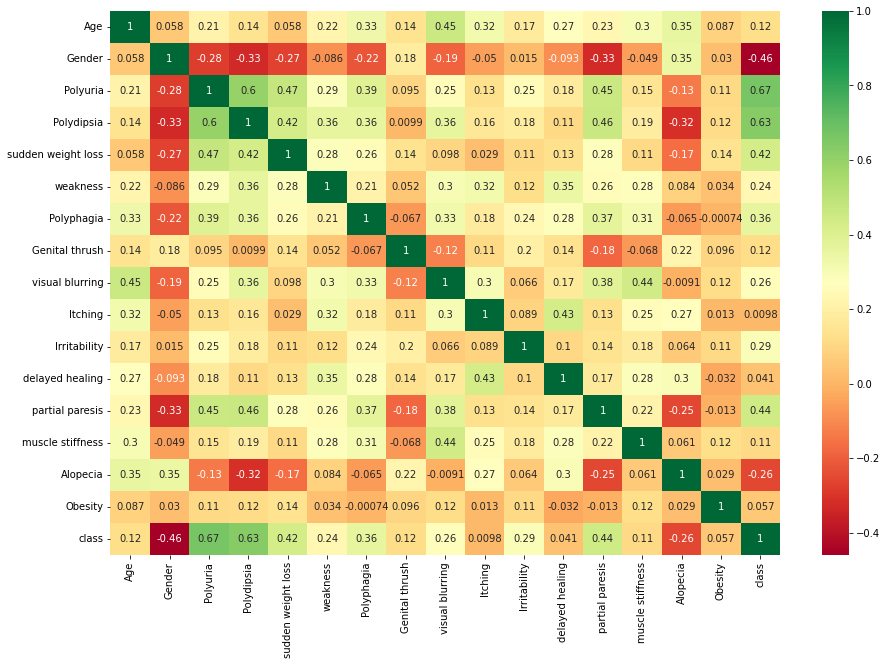

In [19]:
plt.figure(figsize=(15,10))
top_corr_features = correlation_matrix.index
sns.heatmap(correlation_matrix[top_corr_features],annot=True,cmap="RdYlGn")

Aqui está a matriz de correlação para nosso conjunto de treino. Então temos a correlação de cada variável com todos outras.

Podemos desconsiderar a diagonal principal, porque é a correlação da variável com ela mesma, por isso igual a 1.

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

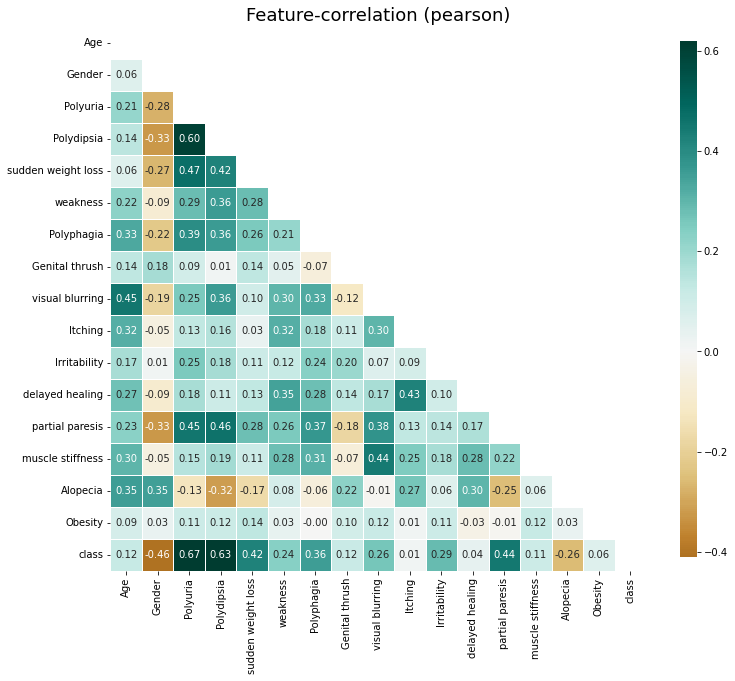

In [20]:
klib.corr_plot(train_set)

Nessa outra imagem, temos uma versão simplificada da matriz de correlação, eliminando valores duplicados* e a diagonal principal.

*Exemplo: Correlação entre Idade e Gênero e a correlação entre Gênero e Idade.

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

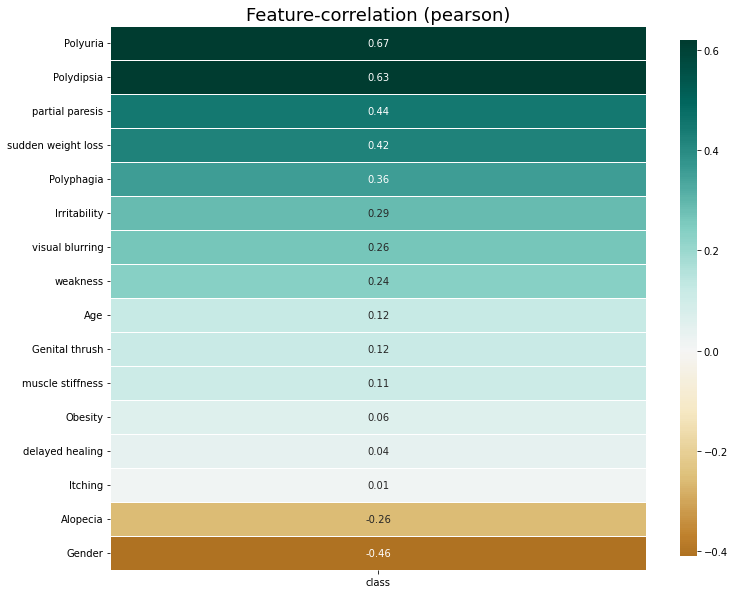

In [21]:
klib.corr_plot(train_set, target='class')

Mas o foco é a relação de uma variável de entrada com a variável de saída. 

Então vamos analisar essa outra imagem, onde é exibido apenas essas correlações.

Aqui a correlação está ordenada, facilitando a visualização.

Podemos perceber que Poliúria e Polidipsia possuem uma correlação positiva relativamente alta. 

Assim, esses sintomas são mais presentes em pessoas com diabetes.

A parecia parcial e a perda de peso repentino também possuem valores significativos, mas menores em valor absoluto. 

Se assemelhando com a correlação de gênero e classe (que é a nossa variável alvo). 

Mas o gênero tem uma correlação negativa. Então as mulheres têm uma tendência maior a doença.

Um dado interessante é que a obesidade possui correlação praticamente nula. 
Mas conforme os órgãos de saúde, embora haja um componente hereditário importante, superior ao do diabetes do tipo 1, 
o ganho de peso, associado ao sedentarismo guardam estreita relação com o aparecimento da diabetes tipo 2.
Estima-se que 60% a 90% dos portadores da diabetes tipo 2 sejam obesos e a incidência é maior após os 40 anos (SBD).
Assim, sabemos que a relação da classe com a obesidade não é uma relação linear, 
mas podemos supor que elas possuam uma relação forte de outro tipo.

O mesmo ocorre com a variável idade, que possui relação linear fraca (0,12).
Mas conforme citado, existe uma tendência maior do indivíduo desenvolver diabetes depois dos 40. 
Deste modo, podemos supor que idade e 'class' têm uma relação forte de outro tipo.


| Feature | p | Correlação linear |
|--- |--- |--- |
| Age | 0.12 | Muito Baixa |
| Gender | -0.46 | Intermediária |
| Polyuria | 0.67 | Relativamente Alta |
| Polydipsia | 0.63 | Relativamente Alta |
| Sudden weight loss | 0.42 | Intermediária |
| Weakness | 0.24 | Baixa |
| Polyphagia | 0.36 | Baixa |
| Genital thrush | 0.12 |Muito Baixa |
| Visual blurring | 0.26 | Baixa |
| Itching | 0.01 | Praticamente nula |
| Irritability | 0.29 | Baixa |
| Delayed healing | 0.04 | Praticamente nula |
| Partial paresis | 0.44 | Intermediária |
| Muscle stiffness | 0.11| Muito Baixa |
| Alopecia | -0.26 | Baixa |
| Obesity | 0.06 | Praticamente nula |


### Modelagem

Um classificador random forest pode ser utilizado para computar a importância das features.

In [22]:
X_train = train_set.iloc[:, 0:16].to_numpy()

y_train = train_set.loc[:, 'class'].to_numpy()

In [23]:
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]
forest = RandomForestClassifier(n_estimators=100)
forest.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

In [25]:
importances

array([0.1044151 , 0.11085771, 0.21429608, 0.16700354, 0.0568992 ,
       0.01971725, 0.03070509, 0.02493052, 0.02922376, 0.02792123,
       0.04171879, 0.03595159, 0.05369355, 0.02538051, 0.03523103,
       0.02205507])

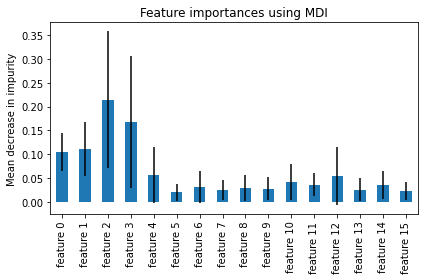

In [26]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Feature Importance se refere a uma classe de técnicas pra atribuir pontuações a recursos de entrada de um modelo preditivo que indica a importância relativa entre cada um dos recursos ao fazer uma previsão.
A pontuação do feature importance pode ser calculada por problemas que envolvem predição de valores numéricos, chamados regressão e de problemas que envolvem a predição de toda uma classe, chamada classificação.

No nosso trabalho estamos usando a classificação.
A feature importe permite que tenhamos uma melhor visão sobre aquele conjunto de dados, sobre o modelo e que a predição em si melhore.

(fazer análise do grafico e comparar com o anterior)

In [27]:
#X_test
X_test = test_set.iloc[:, 0:16].to_numpy()
#Y_test
y_test = test_set.loc[:, 'class'].to_numpy()
#Train the model using the training sets  
var = forest.fit(X_train,y_train) 
y_pred=forest.predict(X_test)

In [28]:
array_test = var.predict_proba(X_test)

In [29]:
df_with_array_test = pd.DataFrame(array_test,columns=['%NaoTer','%Ter'])

In [30]:
df_with_array_test

,%NaoTer,%Ter
0,0.22,0.78
1,0.00,1.00
2,0.87,0.13
3,0.01,0.99
4,0.02,0.98
...,...,...
99,0.04,0.96
100,0.13,0.87
101,0.00,1.00
102,0.00,1.00


### Avaliação de Desempenho

Avaliação de desempenho com todos os dados (sem separação de treino e teste)

O RMSE trata de uma medida que calcula a raiz quadrática media dos erros entre os valores reais e as predições. 
Com o uso dessa métrica, nós obtivemos um resultado satisfatório em relação ao desempenho do trabalho.

In [31]:
#y_train_positive = df[(df['class']=='Negative')]
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.09805806756909202

### Validação com Confusion Matrix

A Confusion Matrix trata de uma tabela onde conseguimos identificar os tipos de classificação do modelo de classificação binário. 
Com ela, nós conseguimos facilmente calcular valores como acurácia, especificidade, sensibilidade, etc.

In [32]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [33]:
confusion_matrix(y_test, y_pred)

array([[36,  0],
       [ 1, 67]], dtype=int64)

Os verdadeiros negativos (tn) são observações cujo valor real é positivo e o valor previsto também, ou seja, o modelo acertou.

In [34]:
tn

36

Os falsos positivos (fp) são casos em que o resultado correto é negativo, mas o resultado obtido é positivo, então o modelo errou.

In [35]:
fp

0

Os falsos negativos (fn) são casos em que o resultado correto é positivo, mas o resultado obtido é negativo, então o modelo também errou.

In [36]:
fn

1

Os verdadeiros positivos que são observações cujo valor real é positivo e o valor previsto é positivo, ou seja, o modelo acertou.

In [37]:
tp

67

Para analisarmos o quão bem o modelo está fazendo as classificações vamos utilizar as métricas de avaliação: Acurácia, Sensibilidade e Especificidade.

In [38]:
total = tn + fp + fn + tp
accuracy = (tn + tp) / total

accuracy

0.9903846153846154

In [39]:
recall = tp / (tp + fn)

recall

0.9852941176470589

In [40]:
specificity = tn / (tn + fp)

specificity

1.0